# Homework-0


## 1.The Human Eye


<font color=blue>
Contrast sensitivity function (CSF)
</font>


__Input:__   
Resolution : [pixels along with,pixels along height]   
size : [diagonal length in inches, aspect ratio (W/H)]   
Available_Distance : Available distance in metres

__Output:__  
Optimal Distance in metres



In [7]:
import numpy as np


# inputs -- > resolution = [3840,2160] , size = [diagonal length in inches, aspect ratio (W/H)]
def CSF(resolution,size,Available_Distance):
    Height = size[0]/(np.sqrt(1+size[1]**2))
    Width = (size[0]*size[1])/(np.sqrt(1+size[1]**2))
    # width corresponding to 60cycles/deg or 120 pixels
    w = (120*Width)/resolution[0]
    Distance = w/(2*np.tan(np.pi/360))
    Dis_in_metre = np.round(Distance*0.0254,decimals = 3)
    if Dis_in_metre <= Available_Distance:
        print("Optimal distance is {} metres".format(Dis_in_metre))
    else:
        print("Optimal distance is greater than Distance Available . So, The optimal distance is Available distance = {} metres".format(Available_Distance))
    

In [106]:
# example
CSF([1920,2160],[50,16/9],5)

Optimal distance is 3.964 metres


## 2.The Basics 

__IMAGES__:

1. aerial - 5.1.10
2. airplane - 5.1.11
3. APC - 7.1.08

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

####  2.1 Reading Contents of Image

In [133]:
I1 = mpimg.imread(r'C:\Users\abcd\Desktop\Image Processing\Assignment-1\5.1.10.tiff')
I2 = mpimg.imread(r'C:\Users\abcd\Desktop\Image Processing\Assignment-1\5.1.11.tiff')
I3 = mpimg.imread(r'C:\Users\abcd\Desktop\Image Processing\Assignment-1\7.1.08.tiff')

#### 2.2 Displaying the image

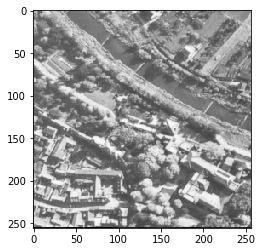

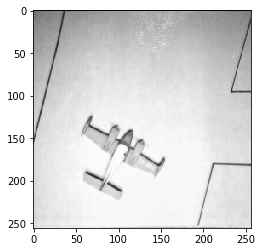

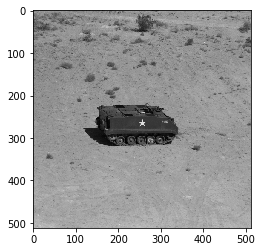

In [12]:
def Display_image(I):
    plt.imshow(I,cmap = "gray")
    plt.show()
    
Display_image(I1)
Display_image(I2)
Display_image(I3)

#### 2.3 Printing the maximum and minimum pixel values of I.

In [13]:
def Max_Pixel_value(I):
    max_pixel = I[0][0]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] > max_pixel:
                max_pixel = I[i][j]
    return max_pixel


def Min_Pixel_value(I):
    min_pixel = I[0][0]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] < min_pixel:
                min_pixel = I[i][j]
    return min_pixel  


In [14]:
print("I  Max  Min ")
for idx,I in enumerate([I1,I2,I3]): 
    print("I"+str(idx+1)+ " " +str(Max_Pixel_value(I)) + "  " + str(Min_Pixel_value(I)))

I  Max  Min 
I1 248  1
I2 232  0
I3 215  12


<font color=blue> Based on above max and min values , No of bits required to represent a pixel is 8 </font>

#### 2.4 Resolution of I

In [15]:
def Resolution_of_img(I):
    return I.shape[0],I.shape[1]

In [16]:
print("I  Resolution ")
for idx,I in enumerate([I1,I2,I3]): 
    a,b = Resolution_of_img(I)
    print("I"+str(idx+1)+ "  " +str(a)+" x "+str(b))

I  Resolution 
I1  256 x 256
I2  256 x 256
I3  512 x 512


#### 2.5 Size of the compressed image

In [131]:
# aerial - 5.1.10
# airplane - 5.1.11
# APC - 7.1.08
# size of compressed image on disk
size_of_aerial = 64_000 #bytes
size_of_airplane = 64_000 
size_of_APC = 256_000

#### 2.6 Efficiency of compressed image

In [138]:
def original_size(I):
    return I.shape[0]*I.shape[1]
Efficiency_aerial = ((original_size(I1)-size_of_aerial)*100)/(original_size(I1))
Efficiency_airplane = ((original_size(I2)-size_of_airplane)*100)/(original_size(I2))
Efficiency_APC = ((original_size(I3)-size_of_APC)*100)/(original_size(I3))
print(Efficiency_aerial)
print(Efficiency_airplane)
print(Efficiency_APC)

2.34375
2.34375
2.34375


#### 2.7 Bitplane of the image I as a binary image.

In [41]:
def Gray_to_bitplanes(I):
    Img = []
    for k in reversed(range(8)):
        temp = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                res = bin(I[i][j])[2:]
                res = res.zfill(8)
                temp[i][j] = int(res[k])
        Img.append(temp)
    return Img
           
def Plot_BitPlanes(Data):
    fig , axes = plt.subplots(4,2,figsize = (15,20))
    for i in range(8):
        axes[i//2][i%2].imshow(Data[i],cmap = "gray")
        axes[i//2][i%2].set_title("Bit Plane"+str(i+1))

Bit Planes of Image I1


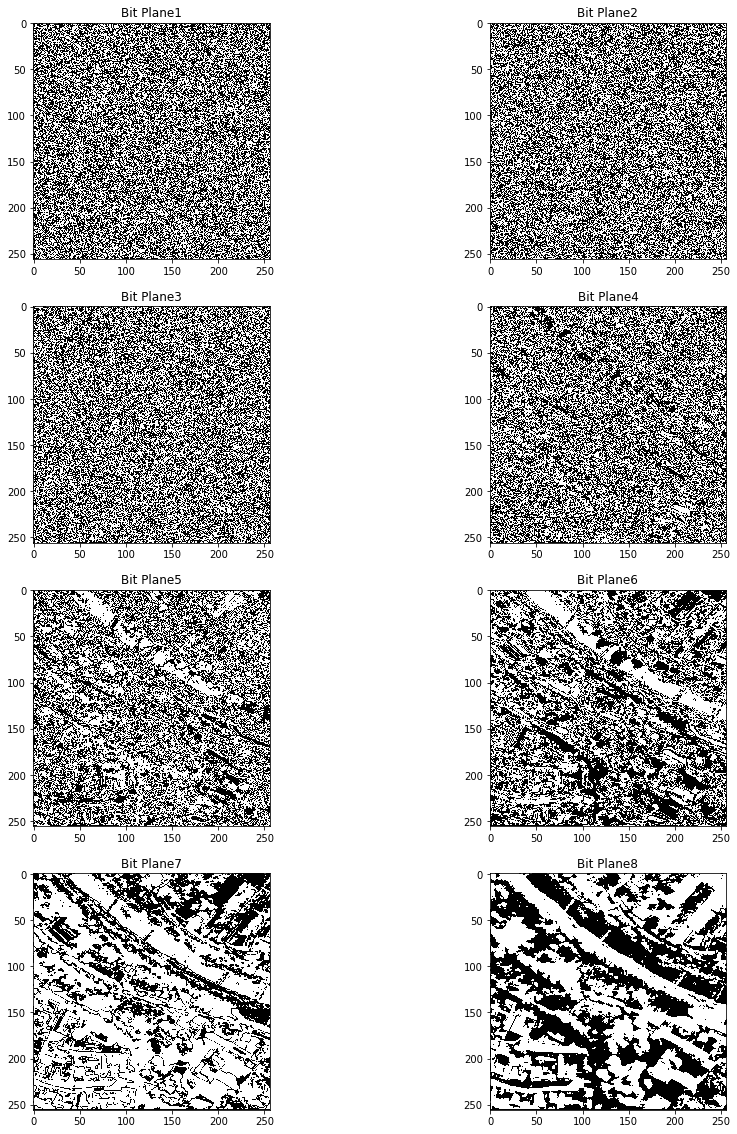

In [42]:
print("Bit Planes of Image I1")
Data1 = Gray_to_bitplanes(I1)
Plot_BitPlanes(Data1)

Bit Planes of Image I2


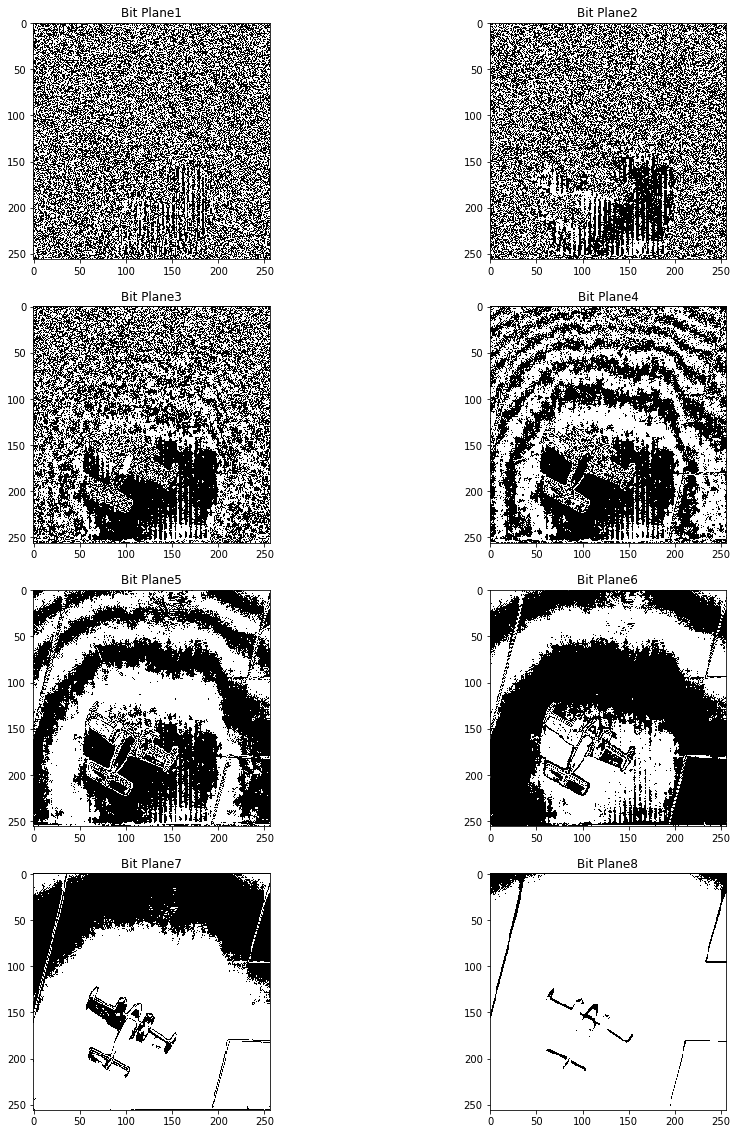

In [43]:
print("Bit Planes of Image I2")
Data2 = Gray_to_bitplanes(I2)
Plot_BitPlanes(Data2)

Bit Planes of Image I3


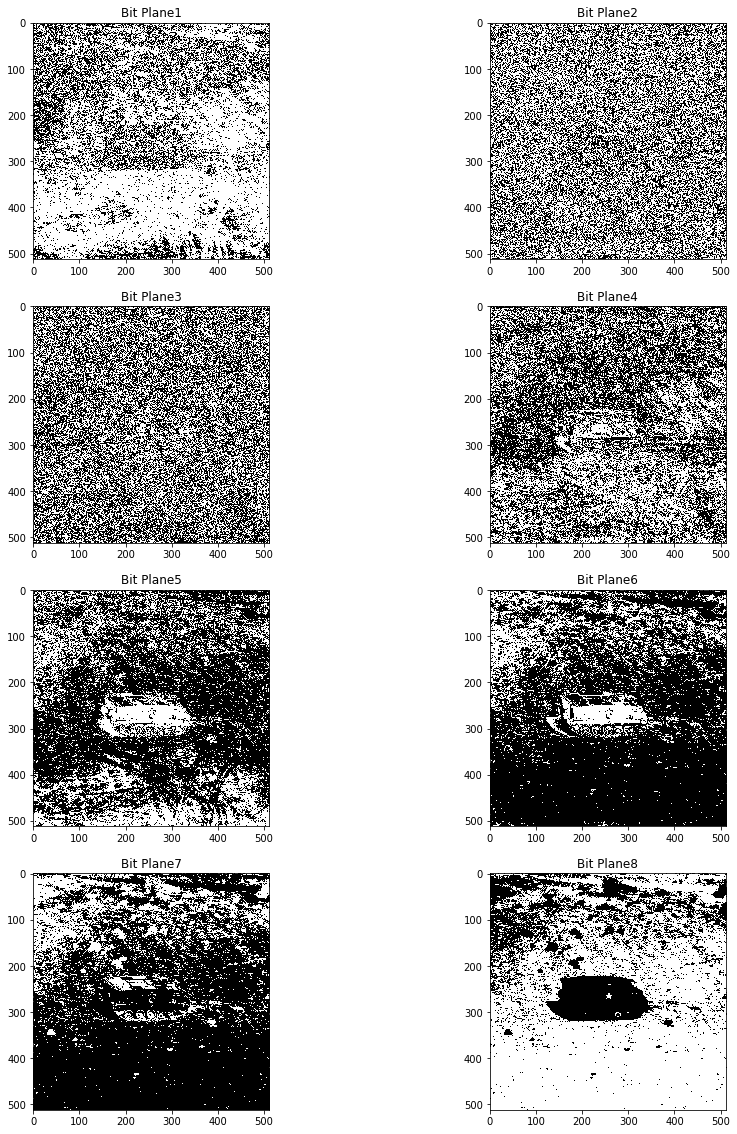

In [44]:
print("Bit Planes of Image I3")
Data3 = Gray_to_bitplanes(I3)
Plot_BitPlanes(Data3)

#### 2.8 Setting lowest Bit plane to 0

In [61]:
def Lowest_bit_plane_zero(I):
    Img = []
    for k in reversed(range(8)):
        temp = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                res = bin(I[i][j])[2:]
                res = res.zfill(8)
                temp[i][j] = I[i][j]- (int(res[k])*(2**(7-k)))
        Img.append(temp)
    return Img
           
def Plot_Lowest_BitPlanes(Data):
    fig , axes = plt.subplots(4,2,figsize = (15,20))
    for i in range(8):
        axes[i//2][i%2].imshow(Data[i],cmap = "gray")
        if i == 0:
            axes[i//2][i%2].set_title("LSB - Setting "+str(i+1)+"th bitplane to 0")
        elif i == 7:
            axes[i//2][i%2].set_title("MSB - Setting "+str(i+1)+"th bitplane to 0")
        else:
            axes[i//2][i%2].set_title("Setting "+str(i+1)+"th bitplane to 0")
            

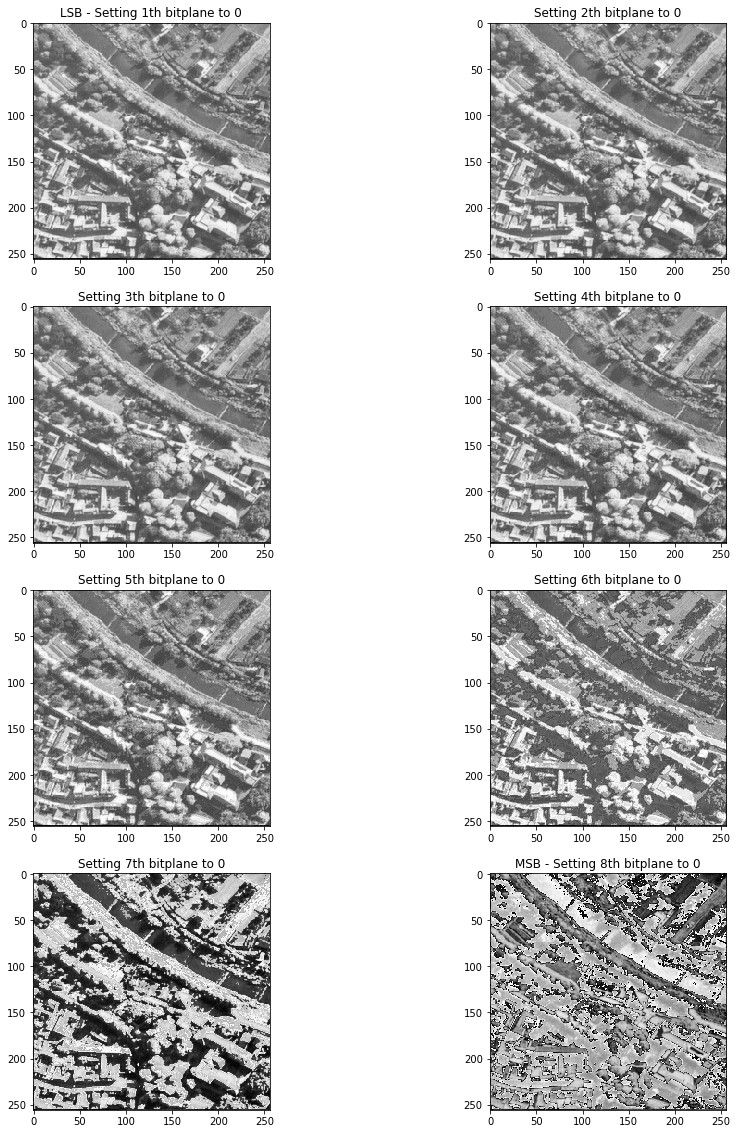

In [62]:
D1 = Lowest_bit_plane_zero(I1)
Plot_Lowest_BitPlanes(D1)

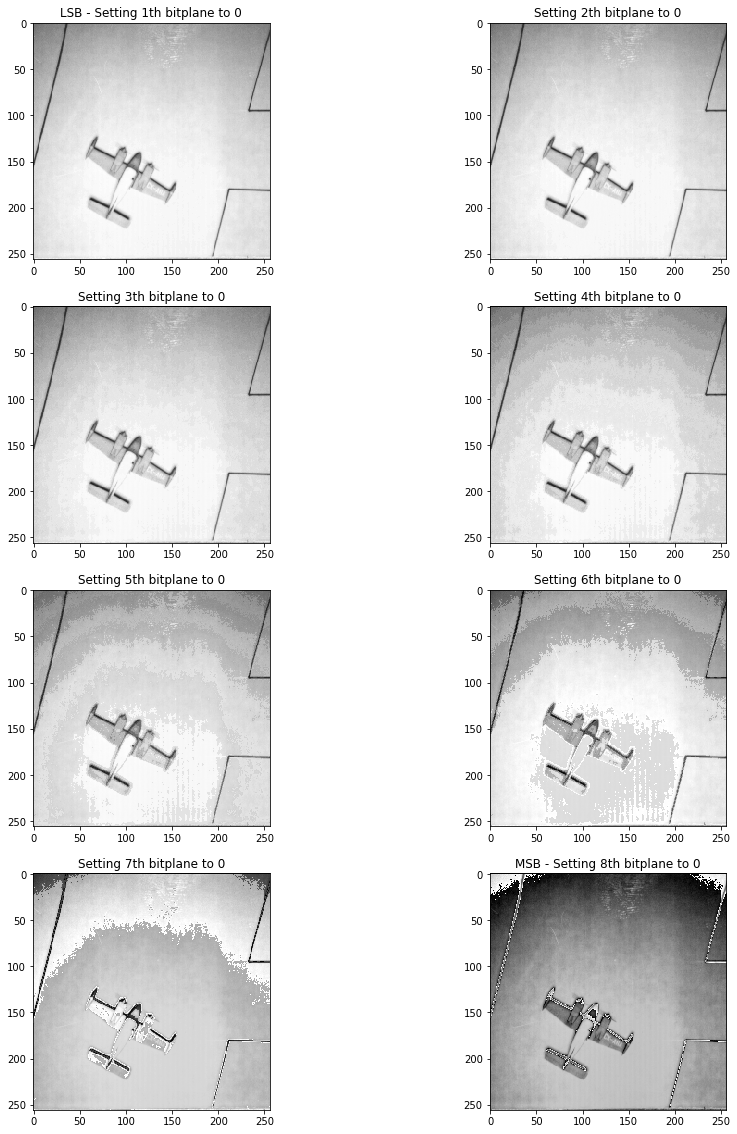

In [63]:
D2 = Lowest_bit_plane_zero(I2)
Plot_Lowest_BitPlanes(D2)

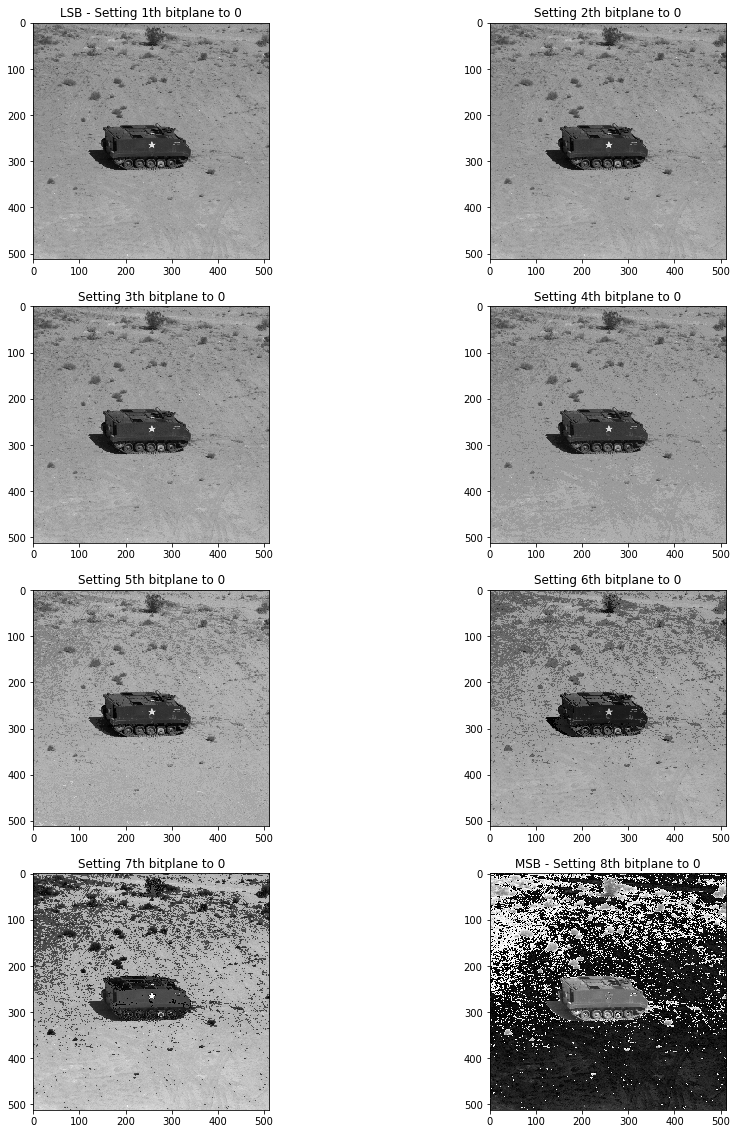

In [64]:
D3 = Lowest_bit_plane_zero(I3)
Plot_Lowest_BitPlanes(D3)

__Observations__ :
1. We can observe that setting lowest Bit Planes to zero doesn't the effect image
2. While setting the highest Bit Planes to zero effects the image 
3. So Highest bit planes are highly important than lowest Bit planes.

#### 2.9 Decreasing Quantization level

In [65]:
def ReQuantized_Plot(I):
    for k in range(8):
        img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                img[i][j] = I[i][j]//(2**k)
        plt.imshow(img,cmap = "gray")
        plt.title(str(I.shape[0]//2**k)+" "+ " levels")
        plt.show()
    

FOR I1


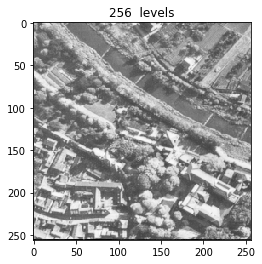

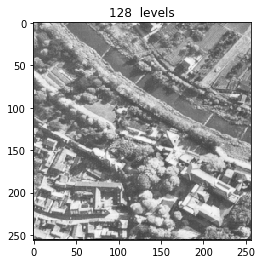

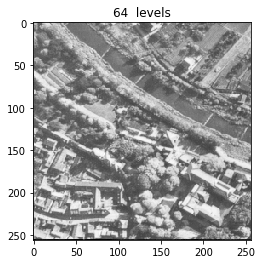

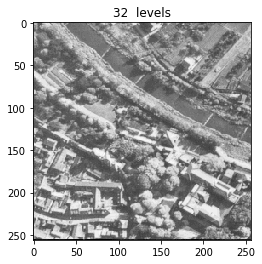

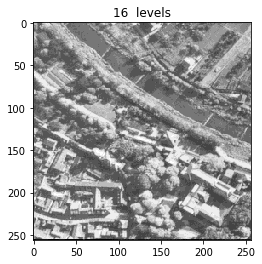

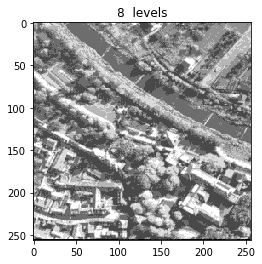

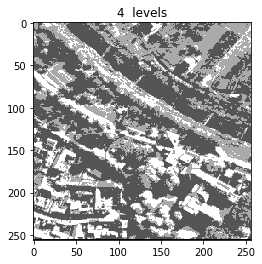

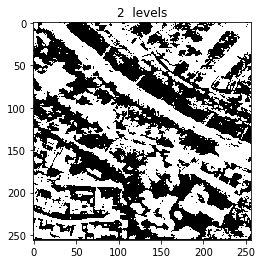

In [66]:
print("FOR I1")
ReQuantized_Plot(I1)

FOR I2


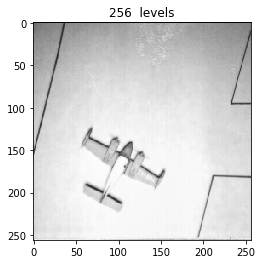

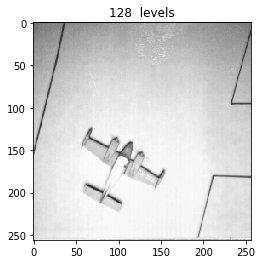

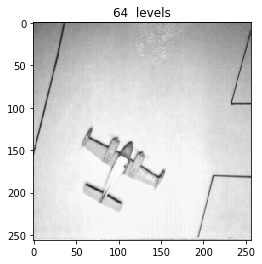

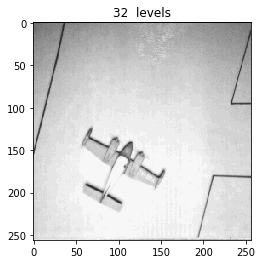

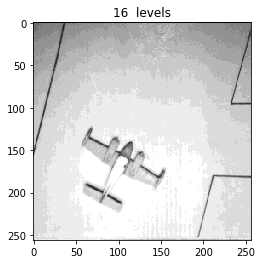

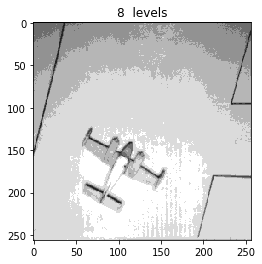

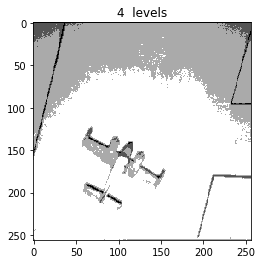

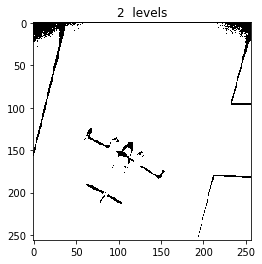

In [67]:
print("FOR I2")
ReQuantized_Plot(I2)

FOR I3


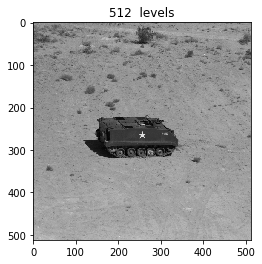

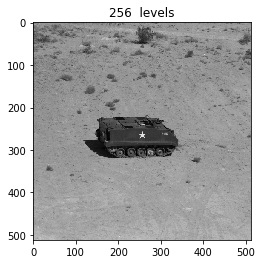

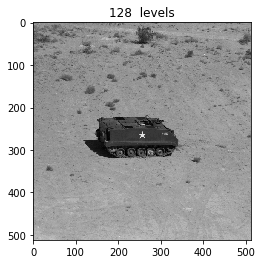

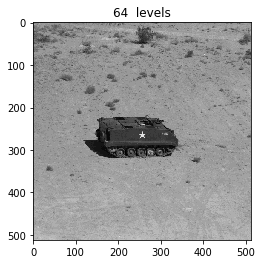

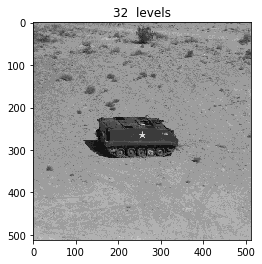

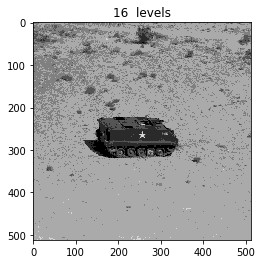

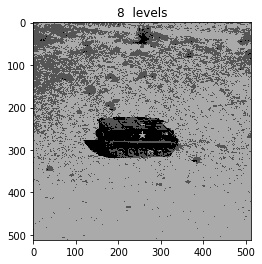

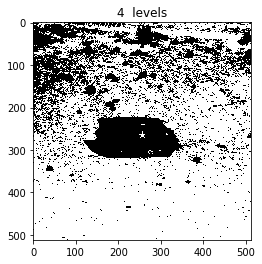

In [68]:
print("FOR I3")
ReQuantized_Plot(I3)

## 3. Binary Morphology

Images: 

1.airplane - 5.1.11   
2.truck  - 7.1.01   
3.airport - 5.3.02   
4.APC - 7.1.08    

In [2]:
# load images
I_airplane = mpimg.imread(r'C:\Users\abcd\Desktop\Image Processing\Assignment-1\5.1.11.tiff')
I_truck = mpimg.imread(r'C:\Users\abcd\Desktop\Image Processing\Assignment-1\7.1.01.tiff')
I_airport = mpimg.imread(r'C:\Users\abcd\Desktop\Image Processing\Assignment-1\5.3.02.tiff')
I_APC = mpimg.imread(r'C:\Users\abcd\Desktop\Image Processing\Assignment-1\7.1.08.tiff')

#### 3.1 Histogram of an image

In [3]:
def Plot_Histogram_Modality(I):
    count = [0]*(256)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            count[I[i][j]] += 1
    plt.xlabel("Gray Levels")
    plt.ylabel("Frequency")
    plt.title("Histogram")
    plt.grid(axis='y', alpha=0.75)
    plt.stem(count,use_line_collection='True')
    plt.show()
    max_freq = 0
    max_level = 0
    max_freq_count = -1
    for i in range(256):
        if count[i] > max_freq:
            max_freq = count[i]
            max_level = i
            max_freq_count = 0
            
    for i in range(256):       
        if count[i] == max_freq:
            max_freq_count += 1
            
    if max_freq_count == 1:
        print("Modality : Unimodal")
    elif max_freq_count == 2:
        print("Modality : Bimodal")
    elif max_freq_count > 2 and max_freq_count < 254:
        print("Modality : Multimodal")
    else:
        print("Modality : Flat")
    
    print("Max_freq :",max_freq)
    print("Level with max freq :",max_level)
    return  max_freq , max_level

    
            

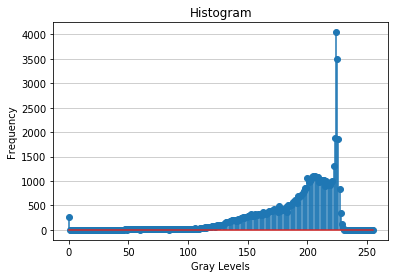

Modality : Unimodal
Max_freq : 4045
Level with max freq : 224


(4045, 224)

In [113]:
Plot_Histogram_Modality(I_airplane)

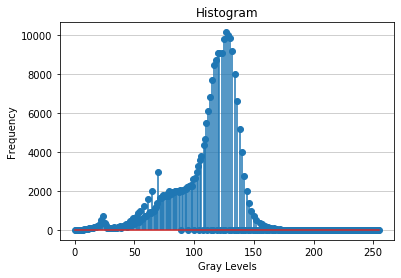

Modality : Unimodal
Max_freq : 10149
Level with max freq : 127


(10149, 127)

In [114]:
Plot_Histogram_Modality(I_truck)

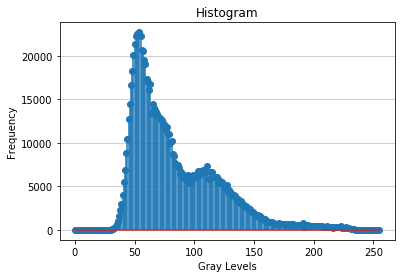

Modality : Unimodal
Max_freq : 22723
Level with max freq : 54


(22723, 54)

In [115]:
Plot_Histogram_Modality(I_airport)

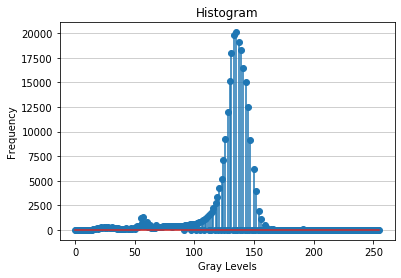

Modality : Unimodal
Max_freq : 20102
Level with max freq : 135


(20102, 135)

In [116]:
Plot_Histogram_Modality(I_APC)

#### 3.2 Modal Thresholding

All the images are unimodal

In [4]:
def Max_level(I):
    count = [0]*(256)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            count[I[i][j]] += 1
    max_freq = 0
    max_level = 0
    for i in range(256):
        if count[i] > max_freq:
            max_freq = count[i]
            max_level = i  
    return max_level
    

def UniModal_threshold(I,max_level):
    Img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] < max_level:
                Img[i][j] = 0
            else:
                Img[i][j] = 1
     
    plt.imshow(Img,cmap = "gray")
    plt.show()
    return np.array(Img)
                

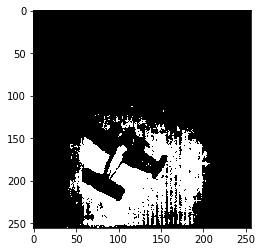

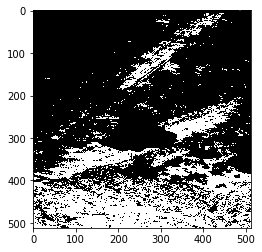

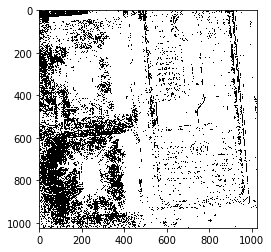

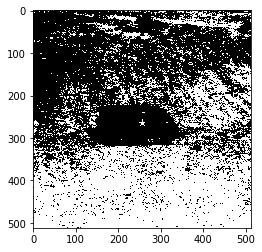

In [135]:
for I in [I_airplane,I_truck,I_airport,I_APC]:
    max_level = Max_level(I)
    UniModal_threshold(I,max_level)

#### 3.3 Connected Components Algorithm

In [92]:
# finding the maximum occurance of k

def Connected_Components(I):
    R = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    k = 1
    freq_count = [0]*(I.shape[0]*I.shape[1])
    for i in range(1,I.shape[0]):
        for j in range(1,I.shape[1]):
            if (I[i][j] == 0 and I[i][j-1] == 1 and I[i-1][j] == 1):
                R[i][j] = k
                freq_count[k] += 1
                k += 1
            elif (I[i][j] == 0 and I[i][j-1] == 1 and I[i-1][j] == 0):
                R[i][j] = R[i-1][j]
                freq_count[k] += 1
            elif (I[i][j] == 0 and I[i][j-1] == 0 and I[i-1][j] == 1):
                R[i][j] = R[i][j-1]
                freq_count[k] += 1
            elif (I[i][j] == 0 and I[i][j-1] == 0 and I[i-1][j] == 0):
                R[i][j] = min(R[i][j-1],R[i-1][j])
                temp = min(R[i][j-1],R[i-1][j])
                R[i][j-1] = temp
                R[i-1][j] = temp
                freq_count[k] += 1
                temp1 = max(R[i][j-1],R[i-1][j])
                freq_count[temp1] -= 1
    maxVal = -1000
    maxIndex = -1000
    for i in range(len(freq_count)):
        if freq_count[i] > maxVal:
            maxVal = freq_count[i]
            maxIndex = i

    return np.array(R),maxIndex

            

In [93]:
max_level = Max_level(I_airport)
Bin_I = UniModal_threshold_without_plot(I_airport,max_level)
R,k = Connected_Components(Bin_I)
print(k)

412


#### 3.4 Minor Bob removal

In [94]:
def UniModal_threshold_without_plot(I,max_level):
    Img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] < max_level:
                Img[i][j] = 0
            else:
                Img[i][j] = 1

    return np.array(Img)

               
def Update_Bob(I,R,k):
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if (I[i][j] == 0) and (R[i][j] != k):
                I[i][j] = 1 
            else:
                I[i][j] = 0
                        
def Complement(I):
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] == 1:
                I[i][j] = 0
            elif I[i][j] == 0:
                I[i][j] = 1

# input is a gray scale image
# Complete steps to remove a minor bob
def Minor_Bob_removal(I):
    max_level = Max_level(I)
    Bin_I = UniModal_threshold_without_plot(I,max_level)
    R,k = Connected_Components(Bin_I) 
    Update_Bob(Bin_I,R,k)
    Complement(Bin_I)
    new_R,new_k = Connected_Components(Bin_I)
    Update_Bob(Bin_I,new_R,new_k)
    Complement(Bin_I)
    plt.imshow(Bin_I,cmap = "gray")
    plt.show()
    
    
    

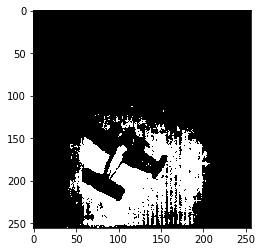

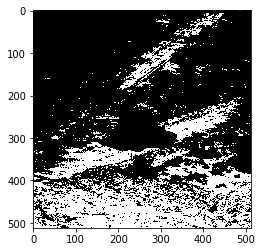

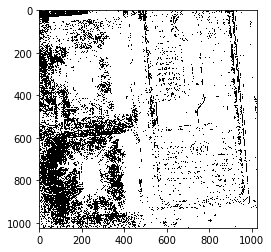

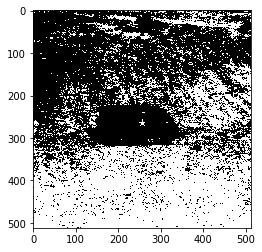

In [95]:
# this codes take more time as many for loops are used to traverse 2D Array 
for I in [I_airplane,I_truck,I_airport,I_APC]:
    Minor_Bob_removal(I)

#### 3.5 Binary Filters : DILATE,ERODE, MEDIAN

In [169]:
def CROSS_Dilate(k,i,j,I):
    val = I[i][j]
    for t in range(i+1,i+k+1):
        val = val or I[t][j]
    for t in range(i-1,i-k-1):
        val = val or I[t][j] 
    for t in range(j+1,j+k+1):
        val = val or I[i][t]
    for t in range(j-1,j-k-1):
        val = val or I[i][t] 
    return val

def CROSS_ERODE(k,i,j,I):
    val = I[i][j]
    for t in range(i+1,i+k+1):
        val = val and I[t][j]
    for t in range(i-1,i-k-1):
        val = val and I[t][j] 
    for t in range(j+1,j+k+1):
        val = val and I[i][t]
    for t in range(j-1,j-k-1):
        val = val and I[i][t] 
    return val    

def CROSS_MEDIAN(k,i,j,I):
    count_0 = 0
    count_1 = 0
    if I[i][j] == 0:
        count_0 += 1
    else:
        count_1 += 1
        
    for t in range(i+1,i+k+1):
        if I[t][j] == 0:
            count_0 += 1
        else:
            count_1 += 1
    for t in range(i-1,i-k-1):
        if I[t][j] == 0:
            count_0 += 1
        else:
            count_1 += 1       
    for t in range(j+1,j+k+1):
        if I[i][t] == 0:
            count_0 += 1
        else:
            count_1 += 1
    for t in range(j-1,j-k-1):
        if I[i][t] == 0:
            count_0 += 1
        else:
            count_1 += 1
    if count_0 > count_1:
        return 0
    else:
        return 1

    
def Square_Dilate(k,i,j,I):
    val = I[i][j]
    for t in range(i+1,i+k+1):
        val = val or I[t][j]
    for t in range(i-1,i-k-1):
        val = val or I[t][j] 
    for t in range(j+1,j+k+1):
        val = val or I[i][t]
    for t in range(j-1,j-k-1):
        val = val or I[i][t] 
    for p in range(i-k,i+k+1):
        for r in range(j-k,j+k+1):
            if p == r:
                val = val or I[p][r]
    return val    

def Square_Erode(k,i,j,I):
    val = I[i][j]
    for t in range(i+1,i+k+1):
        val = val and I[t][j]
    for t in range(i-1,i-k-1):
        val = val and I[t][j] 
    for t in range(j+1,j+k+1):
        val = val and I[i][t]
    for t in range(j-1,j-k-1):
        val = val and I[i][t]
    for p in range(i-k,i+k+1):
        for r in range(j-k,j+k+1):
            if p == r:
                val = val and I[p][r]
    return val   

def Square_Median(k,i,j,I):
    count_0 = 0
    count_1 = 0

    for t in range(i+1,i+k+1):
        if I[t][j] == 0:
            count_0 += 1
        else:
            count_1 += 1
    for t in range(i-1,i-k-1):
        if I[t][j] == 0:
            count_0 += 1
        else:
            count_1 += 1       
    for t in range(j+1,j+k+1):
        if I[i][t] == 0:
            count_0 += 1
        else:
            count_1 += 1
    for t in range(j-1,j-k-1):
        if I[i][t] == 0:
            count_0 += 1
        else:
            count_1 += 1
    for p in range(i-k,i+k+1):
        for r in range(j-k,j+k+1):
            if p == r:
                if I[p][r] == 0:
                    count_0 += 1
                else:
                    count_1 += 1
    
    if count_0 > count_1:
        return 0
    else:
        return 1   
                  
        

In [170]:

def DILATE(I,B):
    filtered_img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    if B[0] == 'CROSS':
        k = B[1]//4  
        # to handle edge cases
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
                
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = CROSS_Dilate(k,i,j,I)
        plt.imshow(filtered_img,cmap = "gray")
        
    elif B[0] == 'SQUARE':
        k = B[1]//8
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = Square_Dilate(k,i,j,I)
        plt.imshow(filtered_img,cmap = "gray")  
        
        

In [171]:
def ERODE(I,B):
    filtered_img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    if B[0] == 'CROSS':
        k = B[1]//4  
        # to handle edge cases
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
                
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = CROSS_ERODE(k,i,j,I)
        plt.imshow(filtered_img,cmap = "gray")
        
    elif B[0] == 'SQUARE':
        k = B[1]//8
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = Square_Erode(k,i,j,I)
        plt.imshow(filtered_img,cmap = "gray")  
                
        

In [172]:

def MEDIAN(I,B):
    filtered_img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    if B[0] == 'CROSS':
        k = B[1]//4  
        # to handle edge cases
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
                
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = CROSS_MEDIAN(k,i,j,I)
        plt.imshow(filtered_img,cmap = "gray") 
        
    elif B[0] == 'SQUARE':
        k = B[1]//8
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = Square_Median(k,i,j,I)
        plt.imshow(filtered_img,cmap = "gray")  
                    

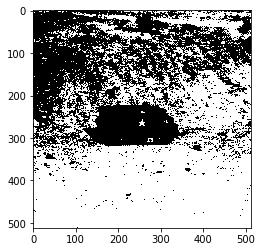

In [149]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
DILATE(Bin_I,['CROSS',5])

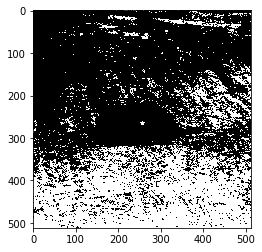

In [150]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
ERODE(Bin_I,['CROSS',5])

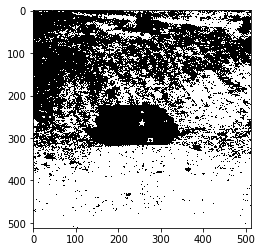

In [151]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
MEDIAN(Bin_I,['CROSS',5])

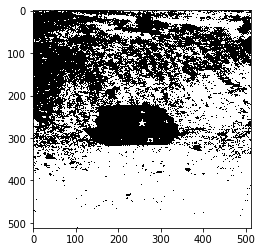

In [162]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
DILATE(Bin_I,['SQUARE',9])

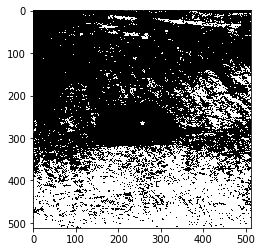

In [168]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
ERODE(Bin_I,['SQUARE',9])

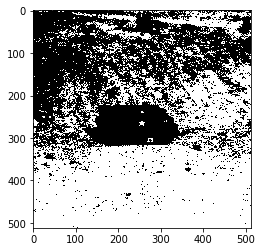

In [173]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
MEDIAN(Bin_I,['SQUARE',9])

#### 3.6 OPEN and CLOSE

In [174]:
def DILATE(I,B):
    filtered_img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    if B[0] == 'CROSS':
        k = B[1]//4  
        # to handle edge cases
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
                
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = CROSS_Dilate(k,i,j,I)
        return np.array(filtered_img)
        
    elif B[0] == 'SQUARE':
        k = B[1]//8
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = Square_Dilate(k,i,j,I)
        return np.array(filtered_img)
    
    
def ERODE(I,B):
    filtered_img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    if B[0] == 'CROSS':
        k = B[1]//4  
        # to handle edge cases
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
                
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = CROSS_ERODE(k,i,j,I)

        
    elif B[0] == 'SQUARE':
        k = B[1]//8
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = Square_Erode(k,i,j,I)
    return np.array(filtered_img)
              
    
    

In [177]:
def OPEN(I,B):
    A = ERODE(I,B)
    final = DILATE(A,B)
    plt.imshow(final,cmap = "gray")
    
def CLOSE(I,B):
    A = DILATE(I,B)
    fin = ERODE(A,B)
    plt.imshow(fin,cmap = "gray")

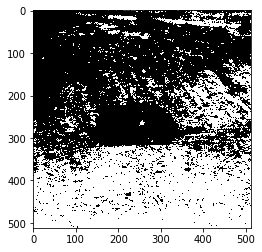

In [178]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
OPEN(Bin_I,['SQUARE',9])

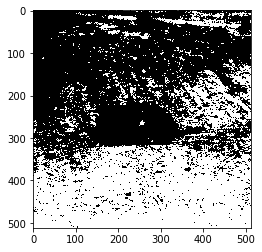

In [179]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
OPEN(Bin_I,['CROSS',5])

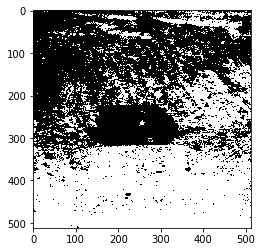

In [180]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
CLOSE(Bin_I,['CROSS',5])

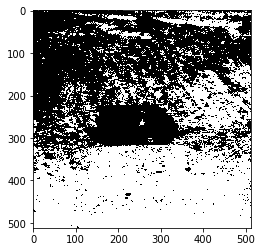

In [181]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
CLOSE(Bin_I,['SQUARE',9])

#### 3.7 OPEN-CLOS and CLOS-OPEN

In [184]:

def OPEN(I,B):
    A = ERODE(I,B)
    final = DILATE(A,B)
    return final
    
def CLOSE(I,B):
    A = DILATE(I,B)
    fin = ERODE(A,B)
    return fin


def OPEN_CLOS(I,B):
    A = CLOSE(I,B)
    final = OPEN(A,B)
    plt.imshow(final,cmap = "gray")
    
def CLOS_OPEN(I,B):
    A = OPEN(I,B)
    final = CLOSE(A,B)
    plt.imshow(final,cmap = "gray")
    

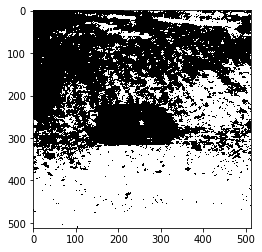

In [185]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
OPEN_CLOS(Bin_I,['SQUARE',9])

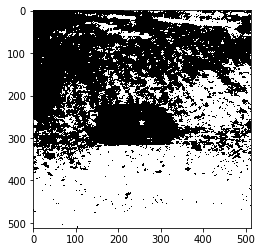

In [186]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
OPEN_CLOS(Bin_I,['CROSS',5])

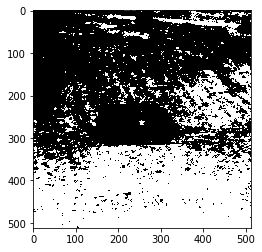

In [187]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
CLOS_OPEN(Bin_I,['CROSS',5])

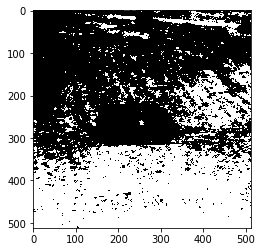

In [188]:
max_level = Max_level(I_APC)
Bin_I = UniModal_threshold_without_plot(I_APC,max_level)
CLOS_OPEN(Bin_I,['SQUARE',9])